<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2023/blob/master/notes/07-regexps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 7: Regular expressions

In [ ]:
#@title Setup
!pip install -qqq tock
from tock import *

<div class="alert alert-info">
    <p><b>Read</b> Section 1.3, but you can save Lemma 1.60 and its proof for next time.</p>
</div>

## Regular expressions

Regular expressions were invented by Stephen Kleene (pronounced clay-knee) back in the 1950s as a characterization of the languages recognized by the earliest neural networks. But they became widely used through various Unix tools, like `grep`, which is where you have likely encountered them.

Our regular expressions are defined inductively. Let $\Sigma$ be an alphabet. The set of *regular expressions* over $\Sigma$ is the smallest set such that:

- If $a \in \Sigma$, then $a$ is a regular expression.
- $\varepsilon$ is a regular expression.
- $\emptyset$ is a regular expression.
- If $\alpha$ and $\beta$ are regular expressions, then $\alpha \cup \beta$ is a regular expression.
- If $\alpha$ and $\beta$ are regular expressions, then $\alpha \beta$ (or $\alpha \circ \beta$) is a regular expression.
- If $\alpha$ is a regular expression, then $\alpha^\ast$ is a regular expression.

The order of operations is star, then concatenation, then union (so, for example, $a\cup bc^\ast = a \cup (b(c^\ast))$). Use parentheses to change the order of operations, just as in arithmetic expressions.

The $\cup$ operator is the same as the Unix `|` operator. Unix regular expressions use a dot (`.`) to match any symbol; we use $\Sigma$ for this purpose.

Another difference is that Unix regular expressions usually match anywhere in a string, whereas our regular expressions usually must match the entire string. When using `grep`, use the `-Ex` flags to approximate our regular expressions (`-E` to get the union operator, `-x` to match the whole line).

In [ ]:
%%file movies.txt
the phantom menace
attack of the clones
revenge of the sith
a new hope
the empire strikes back
return of the jedi
the force awakens
rogue one
the last jedi
solo
the rise of skywalker
the motion picture
the wrath of khan
the search for spock
the voyage home
the final frontier
the undiscovered country
generations
first contact
insurrection
nemesis
into darkness
beyond

Overwriting movies.txt


In [ ]:
!grep -Ex '.*(m | (t|n)|b).*' movies.txt

the phantom menace
attack of the clones
revenge of the sith
a new hope
the empire strikes back
return of the jedi
beyond


Almost right.

**Exercise.** Can you fix the regular expression so that it also accepts `the force awakens`, `rogue one`, `the last jedi`, `solo`, and `the rise of skywalker`, but not `beyond`?

## Converting regular expressions to NFAs

Regular expressions are the third "model of computation" of this course, and they, too, are equivalent to both DFAs and NFAs. The proof involves algorithms to convert between regular expressions and NFAs. Today we're converting regular expressions to NFAs, which is not as difficult as the subset construction from last time.

The algorithm in the book is a slight variation on the algorithm from a paper by Ken Thompson, one of the co-developers of Unix, [for the QED editor](https://swtch.com/~rsc/regexp/regexp1.html), from which are descended `sed`, `grep`, and `vi`. (But many modern regular expression engines actually do not use this algorithm; they use one that is asymptotically much slower!)

The conversion is a recursive procedure that walks through the structure of the regular expression. We'll write it as a proof that uses structural induction.

Theorem: Any regular expression $\alpha$ can be converted into an equivalent NFA.

Proof: By induction on the structure of $\alpha$.

If $\alpha = a$, we can convert it to the NFA:

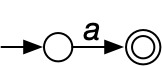

If $\alpha = \varepsilon$, we can convert it to the NFA:

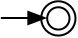

If $\alpha = \emptyset$, we can convert it to the NFA:

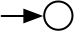

Now we need three inductive steps, which go like this:

If $\alpha = \beta \cup \gamma$, then by the inductive hypothesis, we can convert $\beta$ to an equivalent NFA $B$ and $\gamma$ to an equivalent NFA $C$. Then we can construct an NFA that recognizes $\mathcal{L}(B) \cup \mathcal{L}(C)$. (See below for how to do this.)

Similarly if $\alpha = \beta \gamma$ or $\alpha = \beta^\ast$.

So to complete this proof, we need to show how to perform the union, concatenation, and Kleene star operations on NFAs. These are much easier than the intersection construction was. 

### Union

First we prove that regular languages are closed under union. Given two NFAs $B$ and $C$, we can picture each of them using this cartoon:

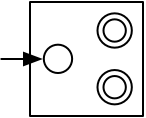

The cartoon only shows the start state and accept states and omits all other states. Also, in reality there might be fewer than two or more than two accept states.

Then this is an NFA that recognizes $\mathcal{L}(B) \cup \mathcal{L}(C)$:

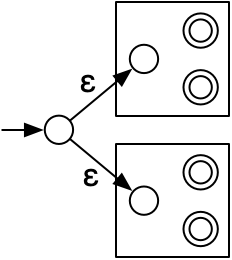

**Exercise**. Write the construction of this NFA more formally.

**Question**. What would be wrong with simply merging the two start states like this? Can you come up with an example where this would go wrong?

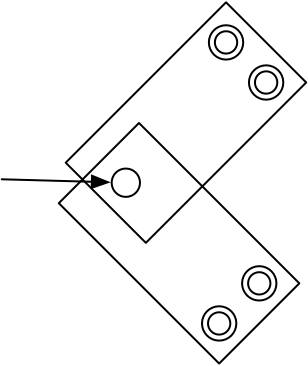

### Concatenation

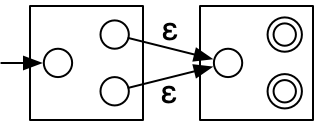

### Kleene star

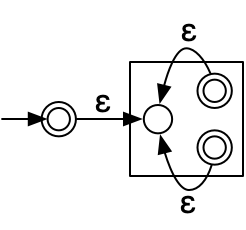

**Question.** Why do we need to create a new start state?

### Putting it together

Here's a step by step visualization of the example from the book. You can try different regular expressions to see how they get converted. (Note that in Tock, unlike in Unix tools, symbols in regular expressions are separated by spaces.)

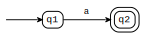

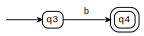

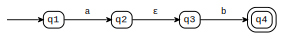

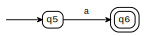

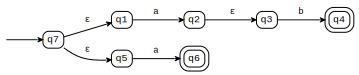

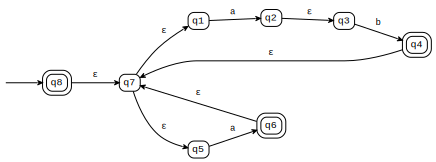

In [ ]:
m = from_regexp('(a b|a)*', display_steps=True)

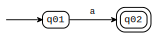

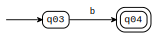

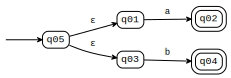

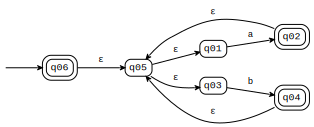

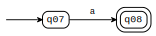

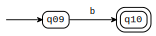

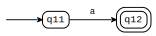

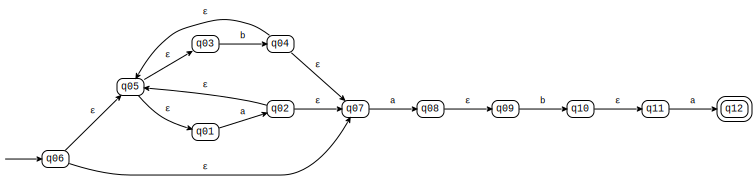

In [ ]:
m = from_regexp('(a|b)* a b a', display_steps=True)

**Question.** If a regular expression has $n$ symbols, how big will the resulting NFA be?

For a very cool "real-time" visualization of (a slightly different version of) this construction, see [Debuggex](https://www.debuggex.com).